https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

In [18]:
#import libraries

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

#load iris data and store as a DataFrame
iris = load_iris()
print (iris.feature_names)
print('\n', iris.DESCR)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   

In [19]:
# Load data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

# Defining and fitting a DecisionTreeClassifier instance
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [20]:
#visualise it
from sklearn.tree import export_graphviz

#note that this creates a dot file called tree.dot
export_graphviz(
    tree,
    out_file = 'tree.dot',
    feature_names = list(X.columns),
    class_names = iris.target_names,
    filled = True,
    rounded = True
)

In [21]:
#This actually requires software to view ffs - try somethign else

[Text(446.4, 453.0, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(223.2, 271.8, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(669.5999999999999, 271.8, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(446.4, 90.59999999999997, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(892.8, 90.59999999999997, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

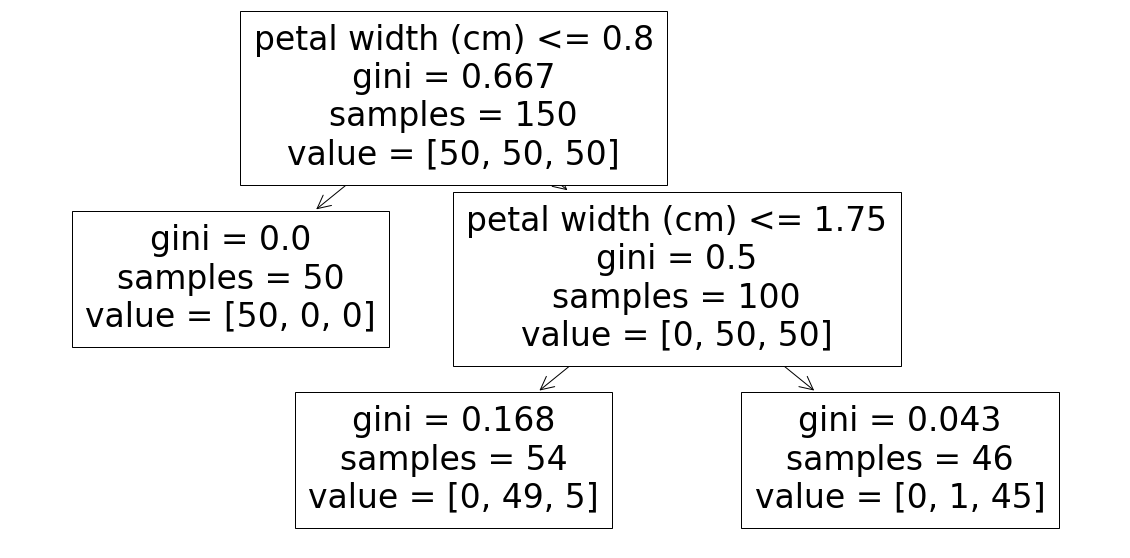

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))

plot_tree(tree, feature_names = iris.feature_names[:] )

In [23]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
#Now, make some predictions based on some new input data
sample_one_pred = int(tree.predict([[5, 5, 1, 3]]))
sample_two_pred = int(tree.predict([[5, 5, 2.6, 1.5]]))
print(f"The first sample most likely belongs a {iris.target_names[sample_one_pred]} flower.")
print(f"The second sample most likely belongs a {iris.target_names[sample_two_pred]} flower.")




The first sample most likely belongs a virginica flower.
The second sample most likely belongs a versicolor flower.


In [ ]:
#Note that these are different to what's shown on the website - problem??